# Main notebook
This notebook is able to reproduce all experiments and plots described in the reproducibility paper.

### Summary:
* ##### [Reproducing models and data for main claims.](#Reproducing-models-and-data-for-main-claims)
* ##### [Reproducing models and data for visualization.](#Reproducing-models-and-data-for-visualization)
* ##### [Reproducing original plots.](#Reproducing-original-plots)
* ##### Additional visualization

In [2]:
import torch
import numpy as np
import os

%load_ext autoreload
device = "cuda" if torch.cuda.is_available() else "cpu"
IFLOW_FOLDER = 'iFlow_experiment'
IVAE_FOLDER = 'iVAE_experiment'
NUMBER_OF_SEEDS_MAIN = 2
NUMBER_OF_SEEDS_VISUALIZATION = 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reproducing models and data for main claims
In the cell below the hyperparameters from theh iFlow paper are used to reproduce the original results. For accurate reproduction you need to run it on a gpu, since the cpu you will get different results.  

For information about other paramaters consult the main.py in the iFlow folder by excuting `!python iFlow/main.py -h` in a code cell.

In [3]:
cuda_flag = '-c' if device == "cuda" else ""

for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {IFLOW_FOLDER} \
            {cuda_flag} \
            '-s' '1' 

for i in range(1, NUMBER_OF_SEEDS_MAIN + 1):
    command_line = '1000_40_5_5_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {IVAE_FOLDER} \
            {cuda_flag} \
            '-s' '1' 


Namespace(anneal=False, batch_size=64, cuda=False, data_args='1000_40_5_5_3_1_gauss_xtanh_u_f', depth=3, epochs=20, experiments_folder='iFlow_experiment', file=None, flow_length=10, flow_type='RQNSF_AG', gpu_id='0', hidden_dim=50, i_what='iFlow', latent_dim=None, log_freq=25, lr=0.001, lr_drop_factor=0.25, lr_patience=10, max_iter=None, nat_param_act='Softplus', no_log=False, num_bins=8, preload=False, seed=1)
Creating dataset data/1/tcl_1000_40_5_5_3_1_gauss_xtanh_u.npz ...
 ... done
training on cpu
data loaded on cpu
setup time: 2.379246234893799s
Beginning training for exp: 1
.. checkpoint at iteration 0 ..
epoch 1: 87.6042s;	loss: -4.6943 (l1: 4.5710, l2: -2.5907, l3: -6.6746);	perf: 0.6494
epoch 2: 88.9375s;	loss: -5.4868 (l1: 8.0932, l2: -6.6302, l3: -6.9499);	perf: 0.6504
epoch 3: 91.3081s;	loss: -6.4233 (l1: 10.6220, l2: -9.3959, l3: -7.6494);	perf: 0.6726
epoch 4: 90.9985s;	loss: -6.7719 (l1: 12.1700, l2: -11.1315, l3: -7.8103);	perf: 0.6928
.. checkpoint at iteration 2500 ..


Epoch   224: reducing learning rate of group 0 to 1.5259e-08.
epoch 9: 4.6934s;	loss: 0.5825;	perf: 0.5250
Epoch   235: reducing learning rate of group 0 to 3.8147e-09.
epoch 10: 4.9825s;	loss: 0.7468;	perf: 0.5333
epoch 11: 4.7330s;	loss: 0.6746;	perf: 0.5279
epoch 12: 5.1876s;	loss: 0.5980;	perf: 0.5216
.. checkpoint at iteration 7500 ..
epoch 13: 4.6702s;	loss: 0.7830;	perf: 0.5216
epoch 14: 5.6046s;	loss: 0.5999;	perf: 0.5295
epoch 15: 5.7197s;	loss: 0.5716;	perf: 0.5276
epoch 16: 5.0727s;	loss: 0.7285;	perf: 0.5259
.. checkpoint at iteration 10000 ..
epoch 17: 4.1143s;	loss: 0.7301;	perf: 0.5210
epoch 18: 3.9056s;	loss: 0.7052;	perf: 0.5254
epoch 19: 4.1593s;	loss: 0.8026;	perf: 0.5240
epoch 20: 3.4864s;	loss: 0.7726;	perf: 0.5221
training time: 98.57598233222961s
Log saved to iVAE_experiment/2021-01-22_15:51:58/log/log.json
Log data saved to iVAE_experiment/2021-01-22_15:51:58/log/data/1.npz
total time: 98.6235818862915s
x.shape == torch.Size([40000, 5])
s.shape == (40000, 5)
u.s

# Reproducing models and data for visualization
In the cell below the data and models are produced used for the visualiation of the latent dimensions. This means that data and the latent dimension are both 2 instead of 5 as this enables us to plot on a 2D graph.

In [ ]:
cuda_flag = '-c' if device == "cuda" else ""
iFlow_vis_folder = 'visualization_' + IFLOW_FOLDER
iVAE_vis_folder = 'visualization_' + IVAE_FOLDER 


for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iFlow' '-ft' 'RQNSF_AG' \
            '-npa' 'Softplus' \
            '-fl' '10' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-exp' {iFlow_vis_folder} \
            {cuda_flag} \
            '-s' '1' 

for i in range(1, NUMBER_OF_SEEDS_VISUALIZATION + 1):
    command_line = '1000_5_2_2_3_{seed}_gauss_xtanh_u_f'.format(seed=i)
    !python 'main.py' \
            '-x' {command_line}\
            '-i' 'iVAE' '-ft' 'RQNSF_AG' \
            '-lr_df' '0.25' \
            '-lr_pn' '10' \
            '-b' '64' \
            '-e' '20' \
            '-l' '1e-3' \
            '-g' '50' \
            '-d' '3' \
            '-exp' {iVAE_vis_folder} \
            '-s' '1' 

# Reproducing original plots


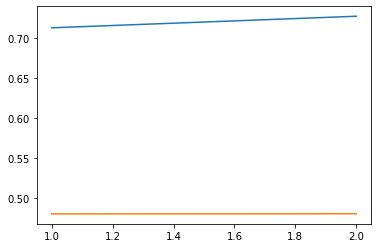

In [30]:
from plot_mcc import plot_mcc, Experiment_folder
%autoreload

folder_paths = [IFLOW_FOLDER, IVAE_FOLDER]
experiments = [Experiment_folder(path, device) for path in folder_paths]

plot_mcc(experiments)

In [ ]:
from plot_correlation
%autoreload

top_iFlow_seed = np.argmax(scores[load_files[0]][0])
top_iVAE_seed = np.argmax(scores[load_files[1]][0])


model, dset, _ = model_and_data_from_log(args.dir, args.device)
model.eval()
plot_latent_correlation(dset, model, args.n_samples, args.sample_offset)

print(top_iFlow_seed)
print(top_iVAE_seed)


In [ ]:
import plot_dataset_difficulty